In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform as tr
from scipy import ndimage as nd
import cv2 as cv
from skimage import exposure
from scipy import ndimage as nd
import os
plt.rc('image', cmap='gray')

import time

In [ ]:
files.upload()
!ls

Saving grav_lens.jpg to grav_lens.jpg
grav_lens.jpg  sample_data


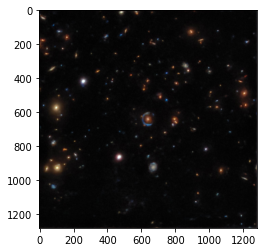

In [ ]:
img = plt.imread('grav_lens.jpg')
img = img/np.amax(img)
plt.imshow(img)


In [ ]:
def gray_level(img):
    gray_conv = np.array([0.2989,0.5870,0.1140]).reshape(1,1,3)
    return np.float32(np.sum(img*gray_conv,axis=2))

def brightest_region(image,reg_rows,reg_cols):
    """    brightest_sum = 0
    brightest_region = (0,0)

    for r in range(image.shape[0]):
      for c in range(image.shape[1]):
        sum = image[r][c]
        if sum > brightest_sum:
          brightest_sum = sum
          brightest_region = (r,c)

    print('brightest_sum: ', brightest_sum)
    print('brightest_region: ', brightest_region)"""
    regions = region_means(image, reg_rows, reg_cols)
    brightest = np.argmax(regions)
    brightest = brightest
    return brightest // regions.shape[1], brightest % regions.shape[1]

def region_means(image,reg_rows,reg_cols):
    gray_img = gray_level(image)
    new_arr = np.zeros((gray_img.shape[0] - reg_rows + 1, gray_img.shape[1] - reg_cols + 1))
    print(gray_img.shape)
    print(new_arr.shape)

    for r in range(new_arr.shape[0]):
      for c in range(new_arr.shape[1]):
        sum = np.sum(gray_img[r:r+reg_rows-1,c:c+reg_cols-1])
        new_arr[r][c] = sum

    return new_arr / (reg_rows * reg_cols)


### Part 1:

Write a function to find the brightest region of a given size in an image.

Above there is the code to find the brightest region.

In [ ]:
r1,c1 = 100,100
start = time.time()
max_r, max_c = brightest_region(img,r1,c1)
elapsed_time2 = time.time() - start
print('elapsed time', elapsed_time2,'secs')
print('Brigthest region top-left corner is ({},{})'.format( max_r, max_c))

(1280, 1280)
(1181, 1181)
elapsed time 15.329471111297607 secs
Brigthest region top-left corner is (871,37)


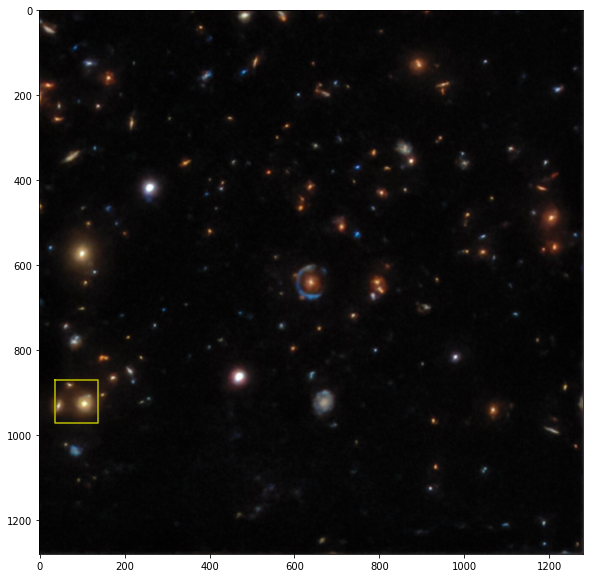

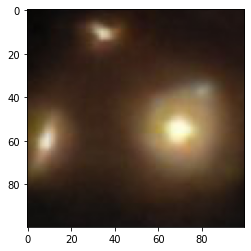

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.plot([max_c,max_c, max_c+c1,max_c+c1,max_c], [max_r,max_r+r1, max_r+r1, max_r,max_r],color='y')
plt.figure()
plt.imshow(img[max_r:max_r+r1, max_c:max_c+c1])

### Part 2:

Apply your function to find the brightest region of sizes (30,30), (60,60) and (120,120) in the image provided and find the running time of the sequence of operations.

(1280, 1280)
(1251, 1251)
elapsed time 10.475794315338135 secs
Brigthest region top-left corner is (849,456)
(1280, 1280)
(1221, 1221)
elapsed time 11.888193845748901 secs
Brigthest region top-left corner is (896,77)
(1280, 1280)
(1161, 1161)
elapsed time 17.942336559295654 secs
Brigthest region top-left corner is (861,34)


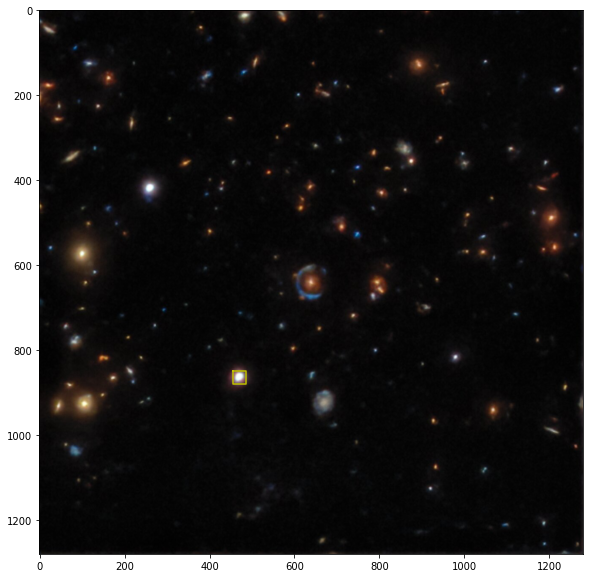

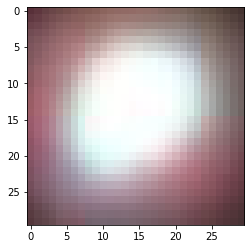

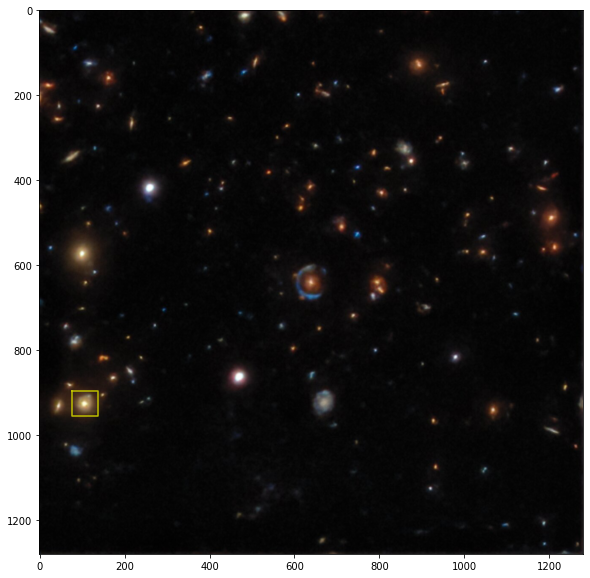

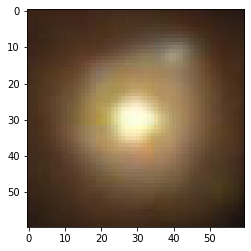

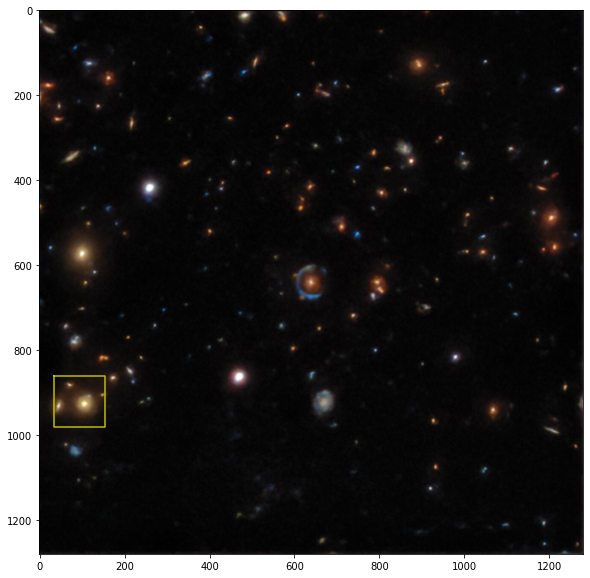

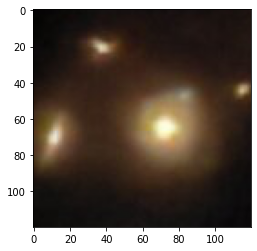

In [ ]:
region_sizes = [(30,30), (60,60), (120,120)]
for size in (region_sizes):
  r1,c1 = size[0],size[1]
  start = time.time()
  max_r, max_c = brightest_region(img,r1,c1)
  elapsed_time2 = time.time() - start
  print('elapsed time', elapsed_time2,'secs')
  print('Brigthest region top-left corner is ({},{})'.format( max_r, max_c))

  plt.figure(figsize=(14,10))
  plt.imshow(img)
  plt.plot([max_c,max_c, max_c+c1,max_c+c1,max_c], [max_r,max_r+r1, max_r+r1, max_r,max_r],color='y')
  plt.figure()
  plt.imshow(img[max_r:max_r+r1, max_c:max_c+c1])

### Part 3:

Reeat Part 1 and 2 but now using the integral image trick.

In [ ]:
# Using integral trick
def brightest_region_integral(image,reg_rows,reg_cols):
    regions = region_means_integral(image, reg_rows, reg_cols)
    brightest = np.argmax(regions)
    brightest = brightest // regions.shape[1]-1, (brightest % regions.shape[1]) + 1
    return brightest

def region_means_integral(image,reg_rows,reg_cols):
    gray_img = gray_level(image)
    new_arr = np.zeros((gray_img.shape[0] - reg_rows + 1, gray_img.shape[1] - reg_cols + 1))
    print(gray_img.shape)
    print(new_arr.shape)
    means = np.zeros((img.shape[0]+1,img.shape[1]+1),dtype=np.int32)
    means[1:,1:] = np.cumsum(gray_img,axis=0)
    means = np.cumsum(means,axis=1)

    A = means[reg_rows:,reg_cols:]
    B = means[reg_rows:,:-reg_cols]
    C = means[:-reg_rows,reg_cols:]
    D = means[:-reg_rows,:-reg_cols]

    means = A - B - C + D

    return means

In [ ]:
r1,c1 = 100,100
start = time.time()
max_r, max_c = brightest_region_integral(img,r1,c1)
elapsed_time2 = time.time() - start
print('elapsed time', elapsed_time2,'secs')
print('Brigthest region top-left corner is ({},{})'.format( max_r, max_c))

(1280, 1280)
(1181, 1181)
elapsed time 0.09198188781738281 secs
Brigthest region top-left corner is (871,37)


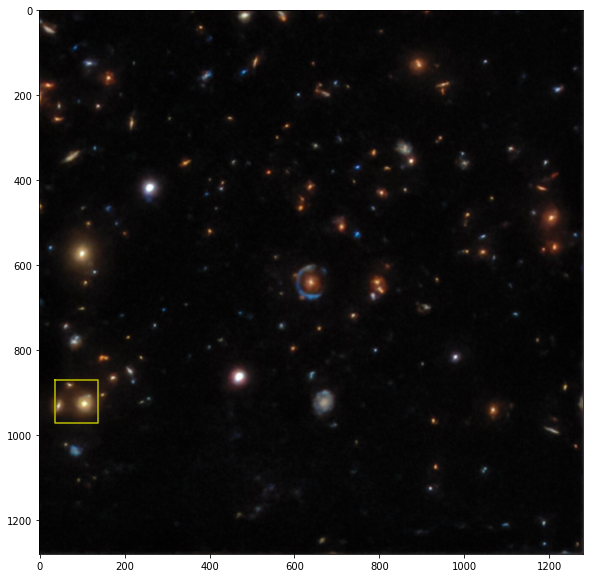

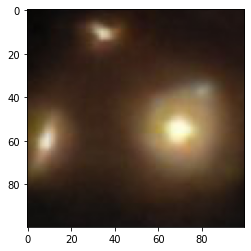

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.plot([max_c,max_c, max_c+c1,max_c+c1,max_c], [max_r,max_r+r1, max_r+r1, max_r,max_r],color='y')
plt.figure()
plt.imshow(img[max_r:max_r+r1, max_c:max_c+c1])

(1280, 1280)
(1251, 1251)
elapsed time 0.10979747772216797 secs
Brigthest region top-left corner is (848,456)
(1280, 1280)
(1221, 1221)
elapsed time 0.08902907371520996 secs
Brigthest region top-left corner is (895,77)
(1280, 1280)
(1161, 1161)
elapsed time 0.12585091590881348 secs
Brigthest region top-left corner is (865,34)


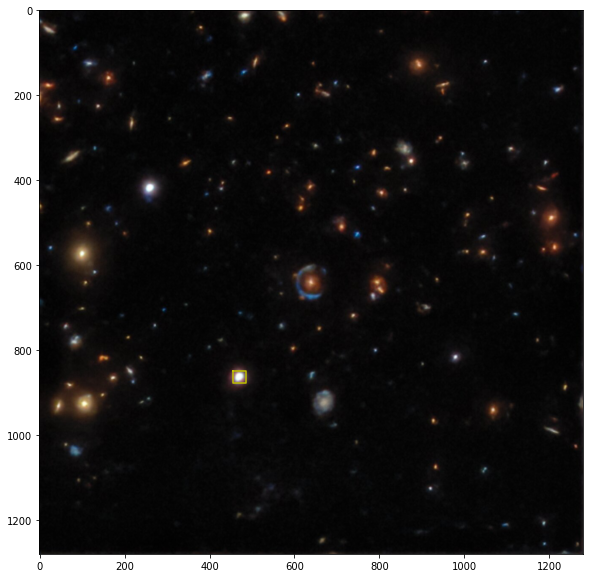

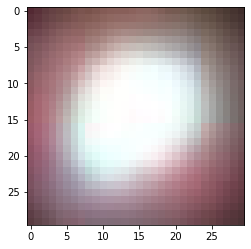

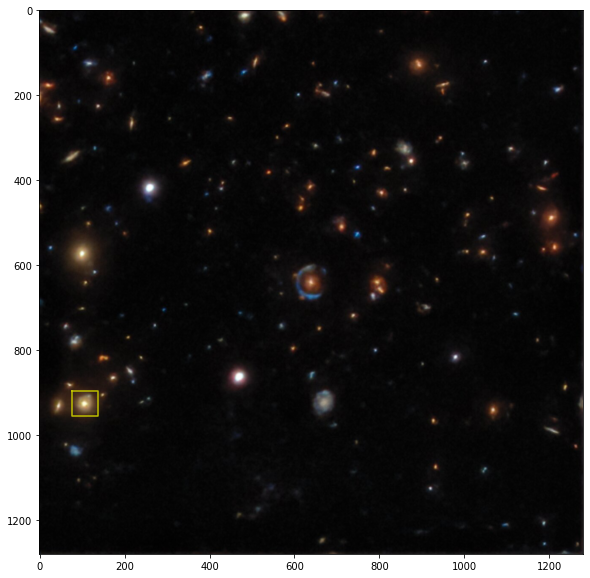

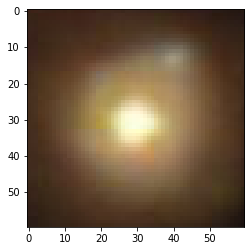

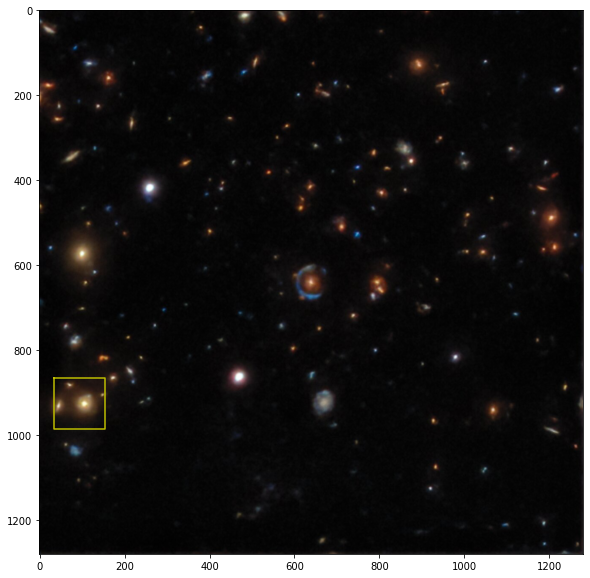

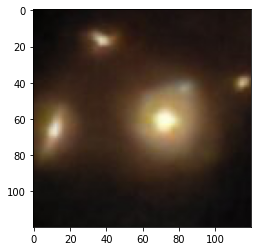

In [ ]:
region_sizes = [(30,30), (60,60), (120,120)]
for size in (region_sizes):
  r1,c1 = size[0],size[1]
  start = time.time()
  max_r, max_c = brightest_region_integral(img,r1,c1)
  elapsed_time2 = time.time() - start
  print('elapsed time', elapsed_time2,'secs')
  print('Brigthest region top-left corner is ({},{})'.format( max_r, max_c))

  plt.figure(figsize=(14,10))
  plt.imshow(img)
  plt.plot([max_c,max_c, max_c+c1,max_c+c1,max_c], [max_r,max_r+r1, max_r+r1, max_r,max_r],color='y')
  plt.figure()
  plt.imshow(img[max_r:max_r+r1, max_c:max_c+c1])